import library

In [17]:
import tensorflow as tf
from tensorflow import keras
import cv2
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense
import os


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


extrak dataset


In [20]:
import zipfile

zip_path = '/content/drive/MyDrive/dataset.zip'
extract_path = '/content/dataset'  # Path tempat dataset akan diekstrak

# Mengekstrak file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [21]:
from pathlib import Path
import imghdr

source_path = './dataset'
img_extensions = ['.png', '.jpg', '.jpeg']
valid_img_type = ['jpeg', 'png', 'gif', 'bmp']

# Iterate through all files in the source path
for file_name in Path(source_path).rglob('*'):
    # Check if the file has a valid image extension
    if file_name.suffix.lower() in img_extensions:
        # Determine the image type using imghdr
        img_type = imghdr.what(file_name)

        # Check if the image type is None (invalid)
        if img_type is None:
            print(f'{file_name} type is none')
            os.remove(file_name)

        # Check if the image type is not in the valid types
        elif img_type not in valid_img_type:
            print(f'{file_name} is a {img_type}, not valid')
            os.remove(file_name)



dataset/pacar_air/stock-photo-red-flower-ornamental-plant-from-asia-impatiens-balsamina-2116535789.jpg type is none
dataset/pacar_air/pacarair_074.jpg is a webp, not valid
dataset/pacar_air/16327881-violet-flower-of-impatiens-balsamina.jpg is a webp, not valid
dataset/pacar_air/pink-impatiens-balsamina-bunga-pacar-260nw-1716382369.jpg type is none
dataset/pacar_air/pacarair_023.jpg type is none
dataset/pacar_air/pacarair_150.jpg is a webp, not valid
dataset/pacar_air/00f928b4-98bc-483f-8fe3-a9539a52f391.jpg type is none
dataset/pacar_air/pacarair_136.jpg type is none
dataset/pacar_air/pacarair_143.jpg is a webp, not valid
dataset/pacar_air/pacarair_095.jpg is a webp, not valid
dataset/pacar_air/pacarair_144.jpg is a webp, not valid
dataset/pacar_air/pacarair_129.jpg is a webp, not valid
dataset/pacar_air/pacarair_180.jpg type is none
dataset/pacar_air/5700438831_74d477bfbc_b.jpg type is none
dataset/pacar_air/pacarair_188.jpg type is none
dataset/pacar_air/pacarair_112.jpg is a webp, n

In [22]:
from PIL import Image

path = "/content/data"

for file_path in Path(path).rglob('*'):
    if file_path.is_file():
        try:
            img = Image.open(file_path)
            img.verify()  # Verifikasi file gambar
        except (IOError, SyntaxError) as e:
            print(f"File gambar tidak valid: {file_path}")
            os.remove(file_path)
    else:
        print(f"Ignoring directory: {file_path}")

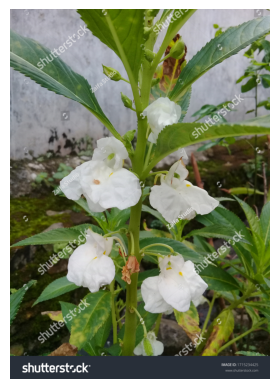

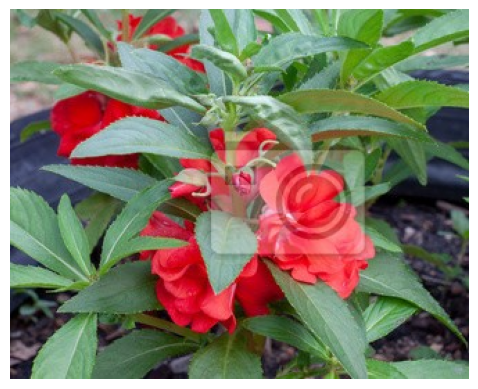

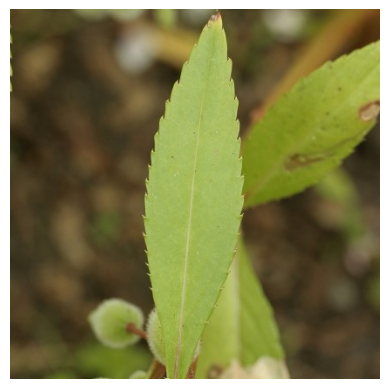

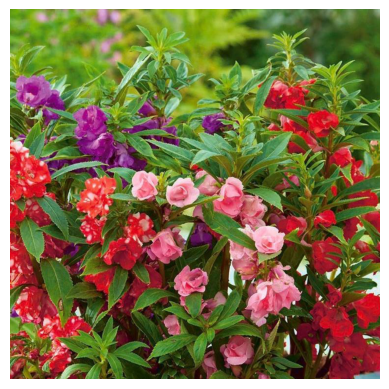

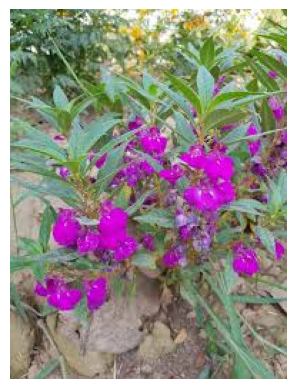

In [23]:
import cv2
import matplotlib.pyplot as plt

# Path dataset yang telah dibersihkan
cleaned_dataset_path = './dataset'

# Mengambil beberapa contoh gambar untuk pengujian
sample_images = []

# Membaca beberapa contoh gambar
for file_path in Path(cleaned_dataset_path).rglob('*'):
    try:
        img = cv2.imread(str(file_path))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)  # Mengubah format warna gambar
            sample_images.append(img)
    except Exception as e:
        print(f"File gambar tidak dapat dibaca: {file_path}")
        print(f"Error: {e}")

    # Mengambil hanya beberapa contoh gambar
    if len(sample_images) == 5:
        break

# Menampilkan contoh gambar
for img in sample_images:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [24]:
from pathlib import Path

dataset_path = '/content/dataset'

# Hitung jumlah file dalam path dataset
file_count = len(list(Path(dataset_path).rglob('*')))

# Tampilkan jumlah file
print(f"Jumlah file dalam path {dataset_path}: {file_count}")

Jumlah file dalam path /content/dataset: 4408


In [25]:



# Membaca semua file dalam folder dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        image_path = os.path.join(root, file)
        try:
            img = Image.open(image_path)
            img.verify()  # Verifikasi file gambar
            # Lanjutkan pemrosesan gambar jika file valid
        except (IOError, SyntaxError) as e:
            print(f"File gambar tidak valid: {image_path}")
            # Lakukan tindakan yang sesuai jika file tidak valid

okeeyy terlihat semua data tersebut sudah valid

In [26]:


# Iterate over all files in the dataset directory
for filename in os.listdir(dataset_path):
    file_path = os.path.join(dataset_path, filename)

    # Check if the current item is a file
    if os.path.isfile(file_path):
        # Verify the file and delete if truncated
        try:
            with open(file_path, 'rb') as f:
                _ = f.read()
        except OSError:
            print(f"Truncated file encountered: {file_path}. Deleting...")
            os.remove(file_path)

In [27]:
# import os
# import shutil
# import zipfile

# source_folder = '/content/dataset'
# zip_file_path = '/content/drive/MyDrive/dataset_clear.zip'  # Ubah dengan lokasi file zip tujuan di drive

# # Membuat file zip
# with zipfile.ZipFile(zip_file_path, 'w') as zipf:
#     # Melakukan iterasi pada setiap file gambar valid dalam folder dataset
#     for root, dirs, files in os.walk(source_folder):
#         for file in files:
#             file_path = os.path.join(root, file)
#             try:
#                 img = Image.open(file_path)
#                 img.verify()  # Verifikasi file gambar
#                 # Menambahkan file gambar ke dalam file zip
#                 zipf.write(file_path, arcname=os.path.relpath(file_path, source_folder))
#                 print(f"File gambar valid berhasil ditambahkan ke zip: {file_path}")
#             except (IOError, SyntaxError) as e:
#                 print(f"File gambar tidak valid: {file_path}")
#                 # Lakukan tindakan yang sesuai jika file tidak valid

# print("Proses pembuatan zip selesai.")

preprocessing

In [28]:
from keras.preprocessing.image import ImageDataGenerator
import os
import random
from shutil import copyfile

# Path ke dataset
dataset_dir = '/content/dataset'

# Path untuk split dataset
split_dir = '/content/dataset_split'
train_dir = os.path.join(split_dir, 'train')
val_dir = os.path.join(split_dir, 'val')

# Persentase split
split_percentage = 0.8

# Membuat folder split
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Membuat folder kelas di dalam folder split
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

# Memisahkan data menjadi train dan validation
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        files = os.listdir(class_dir)
        random.shuffle(files)
        split_index = int(split_percentage * len(files))
        train_files = files[:split_index]
        val_files = files[split_index:]

        for file in train_files:
            src = os.path.join(class_dir, file)
            dst = os.path.join(train_dir, class_name, file)
            copyfile(src, dst)

        for file in val_files:
            src = os.path.join(class_dir, file)
            dst = os.path.join(val_dir, class_name, file)
            copyfile(src, dst)

# Augmentasi dan preprocessing menggunakan ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 4198 images belonging to 15 classes.
Found 1585 images belonging to 15 classes.


pembuatan arsitektur

In [29]:
from keras.applications import MobileNet
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten

# Memuat model dasar MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Membuat model baru
model = Sequential()

# Menambahkan model dasar
model.add(base_model)

# Menambahkan layer-layer CNN tambahan
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (2, 2), activation='relu', padding='same')) # Menggunakan padding='same' untuk menjaga dimensi input
model.add(MaxPooling2D((2, 2)))



# Menambahkan layer Global Average Pooling
model.add(GlobalAveragePooling2D())

# Menambahkan layer-layer dense
model.add(Dense(256, activation='relu'))
model.add(Dense(15, activation='softmax'))

# Membekukan weight pada model dasar agar tidak terupdate saat proses training
base_model.trainable = False

# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan summary dari model
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 5, 5, 64)          589888    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 128)         32896     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 1, 1, 128)        0         
 2D)                                                             
                                                      

Train model

In [30]:

def remove_truncated_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    _ = img.load()
            except OSError:
                print(f"Truncated file encountered: {file_path}. Deleting...")
                os.remove(file_path)

# Panggil fungsi remove_truncated_images dengan direktori training Anda
remove_truncated_images('/content/dataset/val')

In [31]:
import cv2

def remove_truncated_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                _ = cv2.imread(file_path)
            except cv2.error:
                print(f"Truncated file encountered: {file_path}. Deleting...")
                os.remove(file_path)

# Call the remove_truncated_images function with your training directory
remove_truncated_images('/content/dataset/val')

In [43]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/30
10/32 [========>.....................] - ETA: 31s - loss: 0.2494 - accuracy: 0.9156

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


32/32 [==============================] - 94s 3s/step - loss: 0.2523 - accuracy: 0.9160 - val_loss: 0.2084 - val_accuracy: 0.9382
Epoch 2/30
32/32 [==============================] - 88s 3s/step - loss: 0.3607 - accuracy: 0.8916 - val_loss: 0.2844 - val_accuracy: 0.9199
Epoch 3/30
32/32 [==============================] - 91s 3s/step - loss: 0.3236 - accuracy: 0.8896 - val_loss: 0.2250 - val_accuracy: 0.9300
Epoch 4/30
32/32 [==============================] - 85s 3s/step - loss: 0.2402 - accuracy: 0.9189 - val_loss: 0.2094 - val_accuracy: 0.9338
Epoch 5/30
32/32 [==============================] - 91s 3s/step - loss: 0.2809 - accuracy: 0.9062 - val_loss: 0.2296 - val_accuracy: 0.9312
Epoch 6/30
32/32 [==============================] - 87s 3s/step - loss: 0.2870 - accuracy: 0.9170 - val_loss: 0.2125 - val_accuracy: 0.9401
Epoch 7/30
32/32 [==============================] - 125s 4s/step - loss: 0.2988 - accuracy: 0.9078 - val_loss: 0.2705 - val_accuracy: 0.9192
Epoch 8/30
32/32 [============

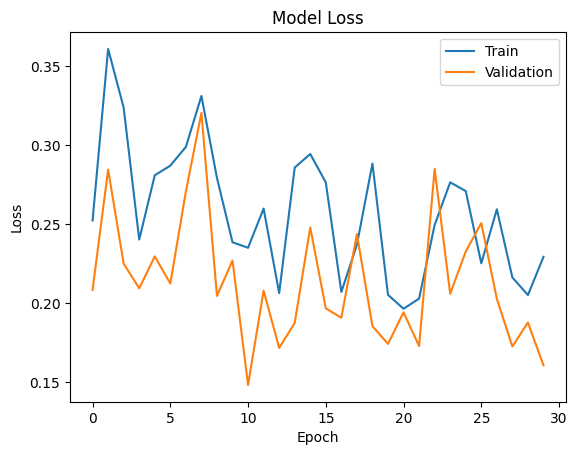

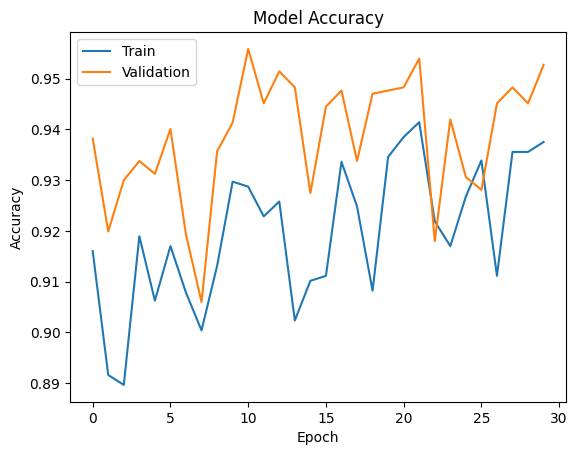

In [44]:
# Membuat plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Membuat plot akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

confussion matriks and precission recal

simpal model ke file h5

In [51]:
from tensorflow.keras.models import load_model

# Simpan model ke file .h5
model.save('/content/model_v2.h5')

# Contoh penggunaan model yang disimpan
loaded_model = load_model('/content/model_v2.h5')

simapn seluruh model dengan saved model

In [52]:
# Simpan model menggunakan metode SavedModel
tf.saved_model.save(model, 'saved_model/my_model')

In [53]:

import zipfile

# Simpan model sebagai SavedModel
tf.saved_model.save(model, '/content/drive/MyDrive/Model_v2_augmentasi_Mobile.net/SavedModel')

# Zipkan direktori SavedModel
with zipfile.ZipFile('/content/drive/MyDrive/Model_v2_augmentasi_SavedModel.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write('/content/drive/MyDrive/Model_v2_augmentasi_Mobile.net/SavedModel/saved_model.pb', 'saved_model.pb')
    zipf.write('/content/drive/MyDrive/Model_v2_augmentasi_Mobile.net/SavedModel/variables/variables.data-00000-of-00001', 'variables/variables.data-00000-of-00001')
    zipf.write('/content/drive/MyDrive/Model_v2_augmentasi_Mobile.net/SavedModel/variables/variables.index', 'variables/variables.index')


convert ke tflite

In [54]:
# Convert model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpal hasil convert
model_path = '/content/model.tflite'
with open(model_path, 'wb') as f:
    f.write(tflite_model)

print('Model TFLite berhasil disimpan di:', model_path)

Model TFLite berhasil disimpan di: /content/model.tflite


coba prediksi

In [55]:
from google.colab import files

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Model_v2_augmentasi_Mobile.net/model_v2.h5')

# Upload image file
uploaded = files.upload()

# Preprocess the input image
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)
image = image.resize((224, 224))  # Resize the image to match the input size of the model
image = np.array(image) / 255.0  # Normalize the image
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Perform prediction
predictions = model.predict(image)

# Process the output predictions as needed
predicted_class = np.argmax(predictions)

# Print the predicted class
class_names = ['alang-alang', 'andong', 'jambu_biji', 'jarong',
               'kumis_kucing', 'kunyit', 'lengkuas',
               'lidah_buaya', 'mengkudu', 'pacar_air', 'saga', 'sambiloto',
               'seledri', 'serai', 'sirih']
predicted_class_name = class_names[predicted_class]

print('Predicted class:', predicted_class)
print('Predicted class name:', predicted_class_name)

Saving 00000051.jpg to 00000051.jpg
1/1 [==============================] - 1s 500ms/step
Predicted class: 0
Predicted class name: alang-alang
